# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План работы**

В данной работе нужно провести исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
<br>
Также, некоторые данные заполнялись пользователем, а некоторые получены автоматически на основе картографических данных, поэтому сперва нужно ознакомиться с данными и исправить какие-то ошибки, если они присутствуют.
<br>
**Цель исследования**
1. Определить от чего зависит рыночная цена недвижимости.
2. Изучить предложения по локации

# Описание данных

* total_images — число фотографий квартиры в объявлении
* last_price — цена на момент снятия с публикации
* total_area — общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition — дата публикации
* rooms — число комнат
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* floor — этаж
* is_apartment — апартаменты (булев тип)
* studio — квартира-студия (булев тип)
* open_plan — свободная планировка (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

# Импортирование нужных библиотек для работы

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Загрузка данных

**Считывание данных**

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #считываем файл и записываем его в переменную data

print(data.info()) #вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод первых 10 строк**

In [ ]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Построение гистограмм для наглядного представления данных**

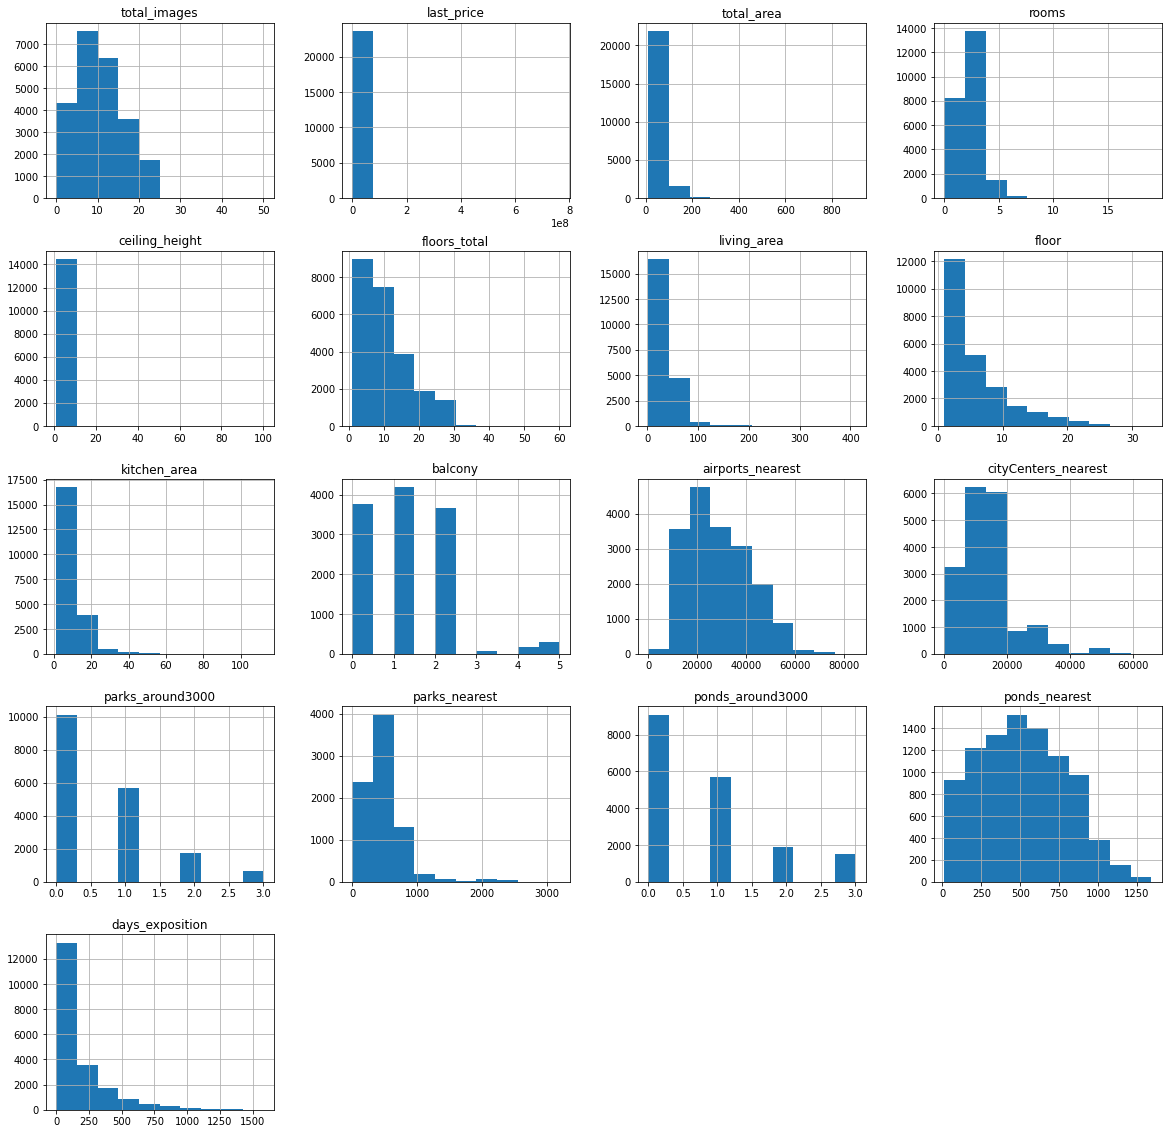

In [ ]:
data.hist(figsize =(20, 20))
plt.show()

**Промежуточный вывод на основе полученных данных**
1. Не все столбцы имеют один стиль названий
2. Необходимо изменить тип данных столбцов:
    * first_day_exposition, для времени есть отдельный тип данных (object -> datetime)
    * floors_total, количество этажей должно быть целочисленным (float64 -> int64)
    * is_apartment, булевый тип по условию (object -> bool)
    * balcony, количество балконов должно быть целочисленным (float64 -> int64)
    * parks_around3000, количество парков должно быть целочисленным (float64 -> int64)
    * ponds_around3000, количество прудов должно быть целочисленным (float64 -> int64)
    * days_exposition, количество дней должно быть целочисленным (float64 -> int64)
3. Есть пропуски в столбцах, которые нужно заполнить

### Предобработка данных

#### Изменение стиля

**Приведение названий столбцов к одному стилю**

In [ ]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest',
                             'parks_around3000': 'parks_around_3000',
                             'ponds_around3000': 'ponds_around_3000'})

**Вывод названий стобцов data после изменений**

In [ ]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


#### Обработка пропущенных значений

In [ ]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


По таблице видно, что пропущенных значений довольно много. Выясним, какие столбцы нужно заполнить и какими значениями.
1. Столбец ceiling_height - количество пропусков составляет 38%. Пропуски заполнить нечем, оставим их.
2. Стобец floors_total - количество пропусков составляет 0,3%. Удалим пропуски, ведь их количество очень мало.
3. Столбец living_area - количество пропусков составляет 8%. Пропуски заполнить нечем, оставлим их.
4. Столбец is_apartment - количество пропусков составляет 88%. Пропусков очень много, но так как это столбец типа bool, можем заполнить пропуски значениями False (тип недвжимости - апартаменты появился не так давно, поэтому их часть, относительно типа недвижимости - квартира, очень мала).
5. Столбец balcony - количество пропусков составляет 48%. Можем заполнить пропуски значениями 0 (эти данные заполнялись человеком и скорее всего количество пропусков это квартиры без балконов).
6. Столбец locality_name - количество пропусков составляет 0,2%. Пропуски заполнить нечем, оставим их.
7. Столбец airports_nearest - количество пропусков составляет 23%. Пропуски заполнить нечем, оставим их.
8. Столбец city_centers_nearest - количество пропусков составляет 23%. Пропуски заполнить нечем, оставим их.
9. Столец parks_around_3000 - количество пропусков составляет 23%. Пропуски заполнить нечем, оставим их.
10. Столбец parks_nearest - количество пропусков составляет 65%. Пропуски заполнить нечем, оставим их.
11. Столбец ponds_around_3000 - количество пропусков составляет 23%. Пропуски заполнить нечем, оставим их.
12. Столец ponds_nearest - количество пропусков составляет 61%. Пропуски заполнить нечем, оставим их.
13. Столбец days_exposition - количество пропусков составляет 13%. Пропуски заполнить нечем, оставим их.

Итак, нужно заполнить пропуски в столбцах: is_apartment и balcony.

**Вывод уникальных значений в столбце is_apartment**

In [ ]:
print(data['is_apartment'].unique())

[nan False True]


**Заполнение пропусков в столбце is_apartment и изменение типа данных**

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

**Вывод уникальных значений и количества пропусков в столбце is_apartment после изменений**

In [ ]:
print(data['is_apartment'].unique()) # уникальные значения
print(data['is_apartment'].isna().sum()) # количество пропусков

[False  True]
0


**Вывод уникальных значений в столбце balcony**

In [ ]:
print(data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


**Заполнение пропусков в столбце balcony и изменение типа данных**

In [ ]:
data['balcony'] = data['balcony'].fillna(0).astype('int') # заполняем пропуски значением 0 и меняем тип данных на int

**Вывод уникальных значений и количества пропусков в столбце balcony после изменений**

In [ ]:
print(data['balcony'].unique()) # уникальные значения
print(data['balcony'].isna().sum()) # количество пропусков

[0 2 1 5 4 3]
0


**Удаление строк с нулевыми значениями**

In [ ]:
data['locality_name'].dropna(inplace=True)
data['floors_total'].dropna(inplace=True)

#### Изменение типов данных оставшихся столбцов

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

В столбце floors_total значение nan представлено не как "NaN", а просто как строка.

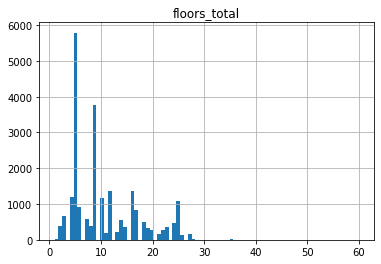

In [ ]:
data.hist('floors_total', bins = 80);

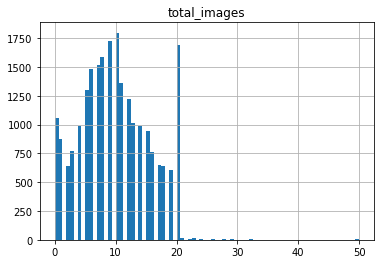

In [ ]:
data.hist('total_images', bins = 80);

In [ ]:
data.loc[data['floors_total'] == 'nan', 'floors_total'] = 0
data.dropna(subset = ['floors_total'], inplace = True)
data.dropna(subset = ['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')
print(data['floors_total'].unique())

[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  8  2 10  7 13 15
 20 28 36 21 35 34 60  1 29 33 52 37]


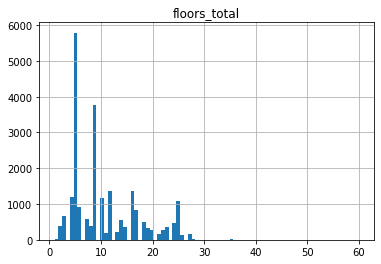

In [ ]:
data.hist('floors_total', bins = 80);

Оставшиеся столбцы перевести нельзя, из-за пропущенных значений
* parks_around3000
* ponds_around3000
* days_exposition

**Вывод общей информации после изменений**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

#### Устранение дубликатов

Устранение неявных дубликатов в столбце 'locality_name'

In [ ]:
print(data['locality_name'].sort_values().unique()) # вывод уникальных значений

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [ ]:
print(len(data['locality_name'].unique())) # вывод количества уникальных значений

365


Большее количество дубликатов возникает из-за слов "поселок" и "посёлок".
Нужно привести все названия локаций (имеющие в себе слово посёлок или поселок) к одному виду "посёлок".

In [ ]:
data['locality_name'] = data['locality_name'].str.replace("поселок", "посёлок")

In [ ]:
print(len(data['locality_name'].unique())) # вывод количества уникальных значений

331


Также, нужно привести строки с названиями "городской посёлок" и "посёлок городского типа" к одному названию "посёлок городского типа"

In [ ]:
data['locality_name'] = data['locality_name'].str.replace("городской посёлок", "посёлок городского типа")
print(data['locality_name'].sort_values().unique()) # вывод уникальных значений

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

In [ ]:
print(len(data['locality_name'].unique())) # вывод количества уникальных значений

324


In [ ]:
print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

Итак, после некоторых изменений количество уникальных значений уменьшилось с 365 до 324

In [ ]:
# check
data.locality_name.nunique()

323

#### Устранение аномальных значений

Для того, чтобы понять в каких столбцах устранять аномальные значения, посмотрим на распределение значений.

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,21743.000000,23613.000000,21382.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.462781,5.877313,10.564128,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.037433,4.873539,5.904316,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"561,672.00",10.00,3.80,1.00,2.00
0.01,1.00,25.33,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.18,3.83,"1,067.00","36,000,000.00",120.00,35.06,23.00,26.00
0.9988,8.00,380.00,25.00,"1,370.36","124,826,112.00",219.82,60.00,26.00,35.00


**Столбец 'last_price'**
* Построим гистограммы
* Убираем значения меньше 100 тыс (выбросные значения)
* Убираем значения больше 73 млн

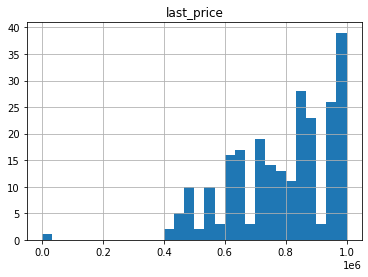

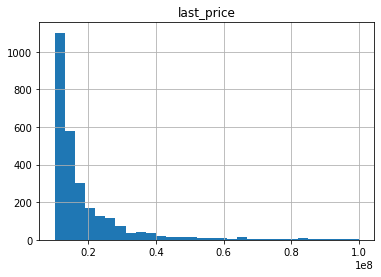

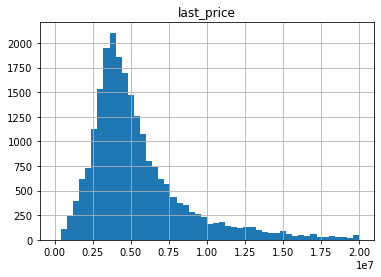

In [ ]:
data.hist('last_price', bins = 30, range = (0, 1000000))
data.hist('last_price', bins = 30, range = (10000000, 100000000))

data.drop(index = data.query('last_price > 73000000').index, inplace = True) # удаление строк с параметром last_index > 73 млн
data.drop(index = data.query('last_price < 100000').index, inplace = True) # удаление строк с параметром last_index < 100 тыс

data.hist('last_price', bins=50, range=(0,2e+07)); # построение гистограммы для столбца last_price


По гистограмме видно, что больше всего количество квартир приходится по цене от 0.25e+07 до 0.6e+07

**Столбец 'total_area'**
* Построим гистограммы, чтобы увидеть редкие и выбивающиеся значения

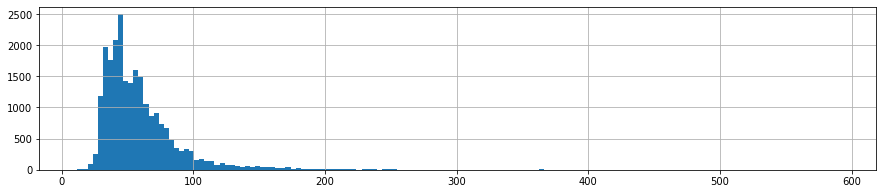

In [ ]:
data.total_area.hist(bins = 150, figsize = (15,3));

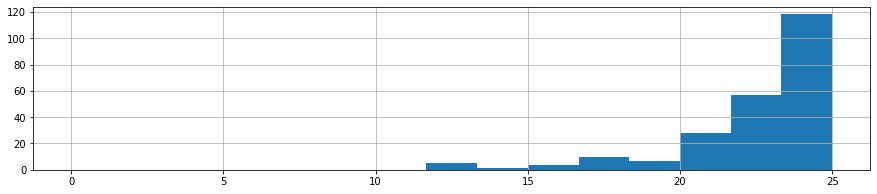

In [ ]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

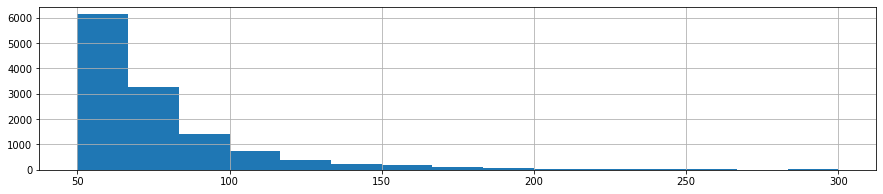

In [ ]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (50, 300));

Можем заметить, что квартиры с общей площадью меньше 20 и больше 250 - редкие значения. Избавимся от них.

In [ ]:
data.drop(index = data.query('total_area < 20').index, inplace = True)
data.drop(index = data.query('total_area > 250').index, inplace = True)

**Столбец 'rooms'**
* Минимальное значение равно 0, возможно придется удалить такие значения (если квартира без комнат не является студией и не свободной планировкой)

In [ ]:
if (data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count()) != 0:
    print('Оставить значения ')
else:
    print('Удалить значения')

Удалить значения


Мы убедились, что квартиры без комнат - либо студия, либо открытая планировка. Поэтому оставим эти значения.

In [ ]:
data.rooms.value_counts().to_frame()

,rooms
1,7995
2,7910
3,5775
4,1155
5,290
0,185
6,78
7,36
8,7
9,3


**Столбец ceiling_height**
* Поменять слишком большие значения

Для потолков есть минимальное ограничение. В России минимум - 2,5 м. Можем предположить, что квартиры с высотой потолков более 25 метров - опечатка. Поделим значения больше 25 на 10.

In [ ]:
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = data['ceiling_height'] / 10 # устранение опечаток

Построим диаграмму размаха высоты потолков

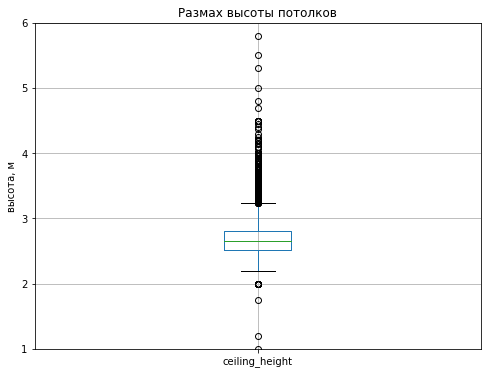

In [ ]:
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Удалим значения меньше 2.5, так как это не по требованиям СНиПа

In [ ]:
data.drop(index = data.query('ceiling_height < 2.5').index, inplace = True) # удаление аномалий

Также удалим значения от 4.2 метров, так как эти значения аномальные

In [ ]:
data.drop(index = data.query('ceiling_height > 4.2').index, inplace = True) # удаление аномалий

Построим гистограмму для столбца 'ceiling_height'

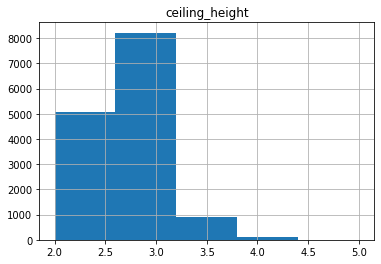

In [ ]:
data.hist('ceiling_height', bins=5, range=(2,5));

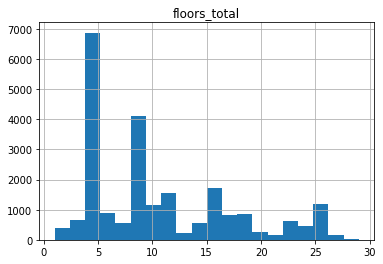

In [ ]:
data.drop(index = data.query('floors_total > 30').index, inplace = True)

data.hist('floors_total', bins = 20);

**Столбец kitchen_area**
* Удалить значение с кухней меньше 4 кв м (аномальное значение)
* Удалить значения с кухней более 50 кв м (не понадобятся для анализа)

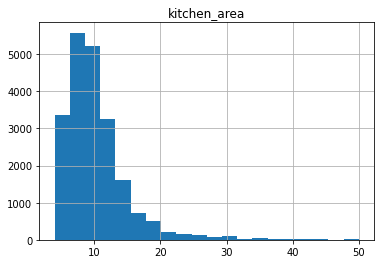

In [ ]:
data.drop(index = data.query('kitchen_area < 4').index, inplace = True)
data.drop(index = data.query('kitchen_area > 50').index, inplace = True)

data.hist('kitchen_area', bins = 20, range = (4, 50));

**Столбец airports_nearest**
* Удалить квартиру, в которой значение airports_nearest < 50 (аномальное значение)

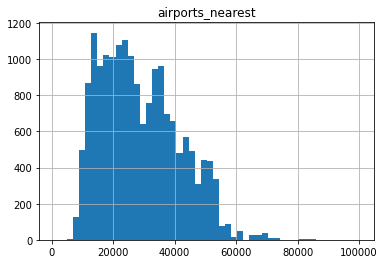

In [ ]:
data.drop(index = data.query('airports_nearest < 50').index, inplace = True)

data.hist('airports_nearest', bins = 50, range = (1000, 100000));

**Столбец days_exposition**
* Построим гистограммы
* Удалить значения больше 1200 дней, так как эти значения выбиваются от нормальных (так как эти значения заполнялись автоматически, возможно, что это неудаленные объявления)
* Удалить значения меньше 3 дней, так как эти значения выбиваются от нормальных

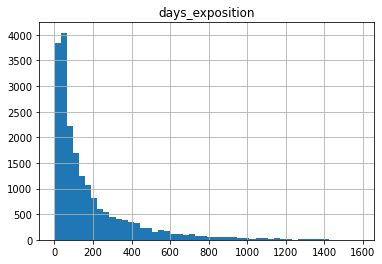

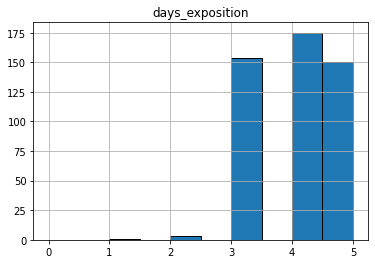

In [ ]:
data.hist('days_exposition', bins = 50);

data.hist('days_exposition', bins = 10, range = (0, 5), ec = 'black');

In [ ]:
data.drop(index = data.query('days_exposition > 1200').index, inplace = True)
data.drop(index = data.query('days_exposition < 3').index, inplace = True)

**Столбец living_area**
* Отбросим значения с жилой площадью меньше 10кв.м.
* Отбросим квартиры с площадью более 125 кв.м.

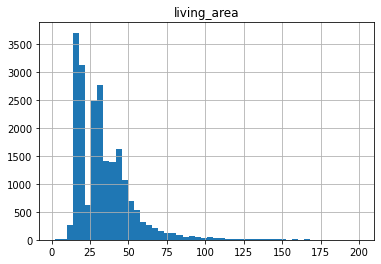

In [ ]:
data.hist('living_area', bins = 50);

In [ ]:
data.drop(index = data.query('living_area < 10').index, inplace = True)
data.drop(index = data.query('living_area > 125').index, inplace = True)

**Оставшиеся столбцы**
* В оставшихся столбцах аномальных значений не наблюдается

Возобновим индексацию после удаления

In [ ]:
data.reset_index(drop = True, inplace = True)

**Промежуточный вывод по предобработке данных**
1. Названия столбцов приведены к одному стилю
2. Обработаны пропущенные значения
3. Изменены типы данных в столбцах
4. Устраненые дубликаты и аномальные значения

### Посчитаем и добавим в таблицу новые столбцы

#### Добавим в таблицу цену одного квадратного метра

In [ ]:
data['cost_per_square'] = data['last_price'] / data['total_area']

#### Добавим в таблицу день, месяц и год публикации объявления

In [ ]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday # день публикации

data['exposition_month'] = data['first_day_exposition'].dt.month # месяц публикации

data['exposition_year'] = data['first_day_exposition'].dt.year # год публикации

#### Добавим в таблицу тип этажа квартиры

In [ ]:
def type_floor(row): # функция для выбора типа этажа
    floor = row['floor']
    floors_total = row['floors_total']
    if floor <= 0:
        return 'некорректный этаж'
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(type_floor, axis=1)

print(data['floor_category'].unique())

['другой' 'первый' 'последний']


#### Добавим в таблицу расстояние в км до центра города

In [ ]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

Проверим добавленные столбцы

In [ ]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


**Промежуточный вывод по добавлению данных**
1. Добавлены такие столбцы, как
    * Цена одного квадратного метра (столбец 'cost_per_square')
    * День, месяц и год публикации (столбцы 'exposition_weekday', 'exposition_month' и 'exposition_year' соотвественно)
    * Тип этажа квартиры (столбец 'floor_category')
    * Расстояние в км до центра города (столбец 'city_centers_nearest_km')
2. Проверены данные добавленных столбцов на корректность значений

### Исследовательский анализ данных

#### Столбец с общей площадью

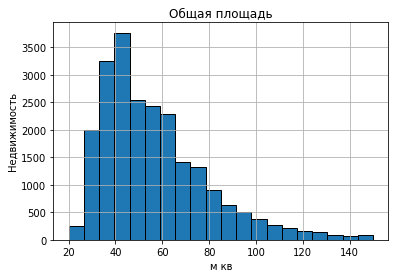

In [ ]:
data.hist('total_area', bins = 20, range = (20, 150), ec = 'black');
plt.xlabel('м кв');
plt.ylabel('Недвижимость');
plt.title('Общая площадь');

Рассматриваемые объекты имеют общую площадь от 20 до 150 кв метров. По графику видно, что большая часть объектов недвижимости имеют общую площадь от 35 до 60 кв метров. Пик достигается примерно в точке 45 кв метров.

#### Столбец с жилой площадью

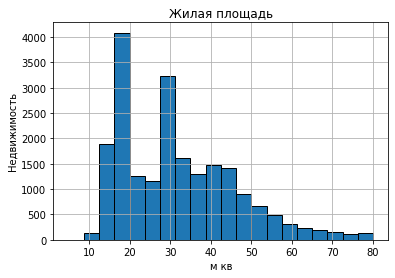

In [ ]:
data.hist('living_area', bins = 20,  range = (5, 80), ec = 'black');
plt.xlabel('м кв');
plt.ylabel('Недвижимость');
plt.title('Жилая площадь');

Рассматриваемые объекты имеют жилую площадь от 5 до 80 кв метров. По графику видно, что большая часть объектов недвижимости имеют жилую площадь от 15 от 30 кв метров. Пик достигается в точке 15 кв метров.

#### Столбец с площадью кухни

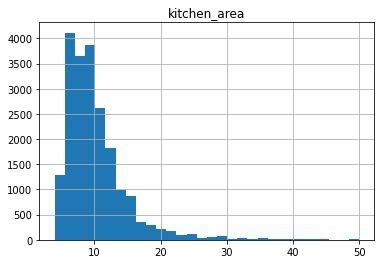

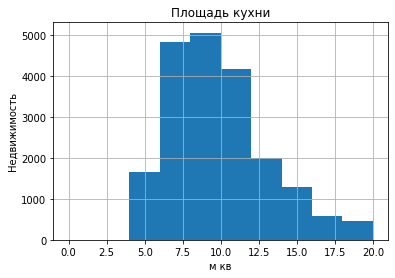

In [ ]:
data.hist('kitchen_area', bins = 30)
data.hist('kitchen_area', bins = 10,  range = (0, 20));
plt.xlabel('м кв');
plt.ylabel('Недвижимость');
plt.title('Площадь кухни');

Рассматриваемые объекты имеют кухонную площадь от 3 до 20 кв метров. По второму графику видно, что большая часть объектов недвижимости имеют кухонную площадь от 6 от 10 кв метров. Пик достигается в точке примерно 8 кв метров.

#### Столбец с ценой объекта

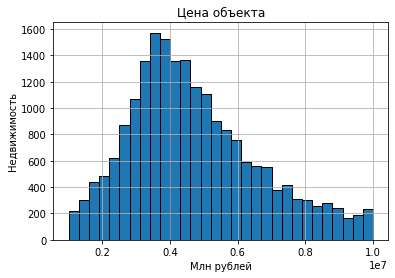

In [ ]:
data.hist('last_price', bins = 30,  range = (1000000, 10000000),ec = 'black');
plt.xlabel('Млн рублей');
plt.ylabel('Недвижимость');
plt.title('Цена объекта');

Рассматриваемые объекты имеют цену от 1 до 10 млн рублей. По графику видно, что большая часть объектов недвижимости имеют цену от 3 млн от 5 млн рублей. Пик достигается в точке примерно 3,5 млн.

#### Столбец с количеством комнат

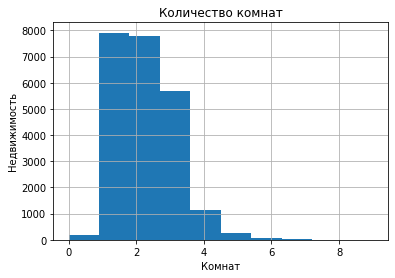

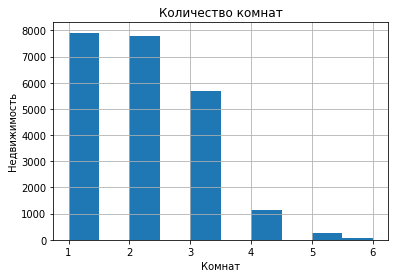

In [ ]:
data.hist('rooms', bins = 10);
plt.xlabel('Комнат');
plt.ylabel('Недвижимость');
plt.title('Количество комнат');


data.hist('rooms', bins = 10, range = (1, 6))
plt.xlabel('Комнат');
plt.ylabel('Недвижимость');
plt.title('Количество комнат');

Рассматриваемые объекты имеют от 1 до 6 комнат. По графику видно, что большая часть объектов недвижимости имеют от 1 до 3 комнат. Пик достигается в точке 1. Квартиры с 0 комнтами не выбросы (либо студия, либо свободная планировка).

#### Столбец с высотой потолков

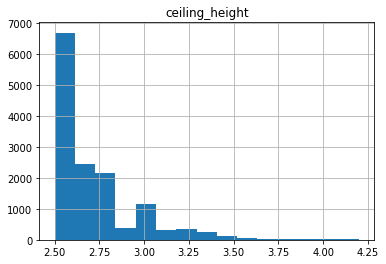

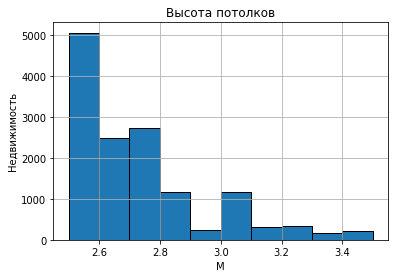

In [ ]:
data.hist('ceiling_height', bins = 15)
data.hist('ceiling_height', bins = 10, range = (2.5, 3.5), ec = 'black');
plt.xlabel('М');
plt.ylabel('Недвижимость');
plt.title('Высота потолков');

Рассматриваемые объекты имеют высоту потолков от 2,5 м до 2,7 м. По второму графику видно, что большая часть объектов недвижимости имеют высоту потолков от 2,5 м до 3 м. Пик достигается в точке 2,5.

#### Этаж квартиры

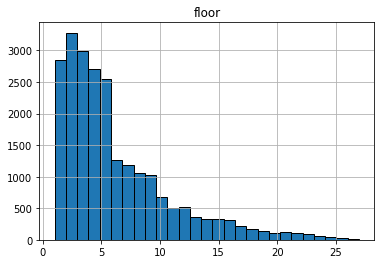

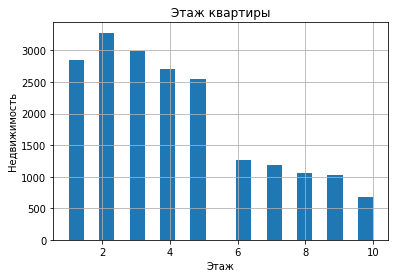

In [ ]:
data.hist('floor', bins = data['floor'].max(), ec = 'black');
data.hist('floor', bins = 20, range = (1, 10))
plt.xlabel('Этаж');
plt.ylabel('Недвижимость');
plt.title('Этаж квартиры');

Рассматриваемые объекты распологаются с 1 по 10 этаж. По второму графику видно, что большая часть объектов недвижимости расположены на 1, 2, 3 этажах. Пик достигается в точке 2.

#### Столбец с типом этажа квартиры

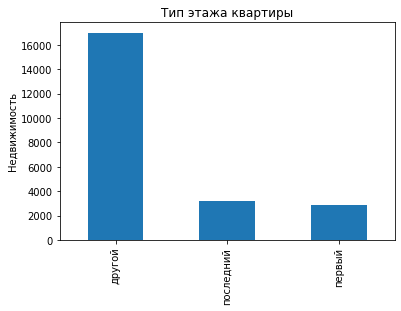

In [ ]:
data['floor_category'].value_counts().plot(kind = 'bar', ylabel = 'Недвижимость', title = 'Тип этажа квартиры');

По графику видно, что основная часть квартир распологается с первого по последний этаж. Также, объекты недвижимости, расположенные на первом или последнем этаже, имеют почти одинаковые значения.

#### Столбец с общем количеством этажей в доме

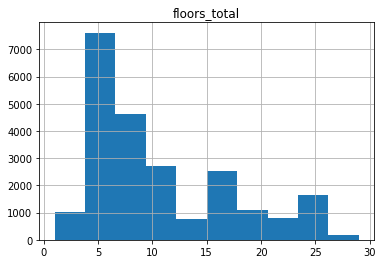

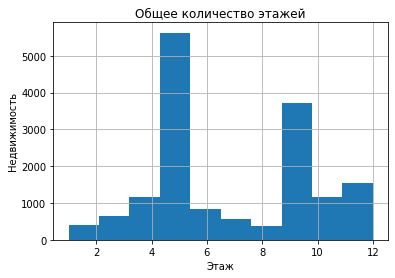

In [ ]:
data.hist('floors_total', bins = 10)
data.hist('floors_total', bins = 10, range = (1, 12));
plt.xlabel('Этаж');
plt.ylabel('Недвижимость');
plt.title('Общее количество этажей');

Рассматриваемые объекты имеют общее количество этажей от 1 до 12. По второму графику видно, что большая часть объектов недвижимости имеют - пятиэтажки и девятиэтажки. Пик достигается в точке 5.

#### Столбец с расстоянием до центра города в метрах

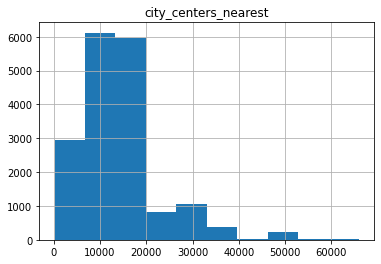

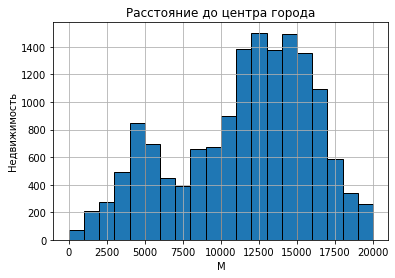

In [ ]:
data.hist('city_centers_nearest', bins = 10);
data.hist('city_centers_nearest', bins = 20, range = (0, 20000), ec = 'black');
plt.xlabel('М');
plt.ylabel('Недвижимость');
plt.title('Расстояние до центра города');

Рассматриваемые объекты находятся от центра на расстоянии от 0 до 20000 м. По второму графику видно, что большая часть объектов недвижимости находится в 12,5 км до 15 км от центра. Пик достигается в точках 12500 и 14500.

#### Столбец с расстоянием до ближайшего аэропорта

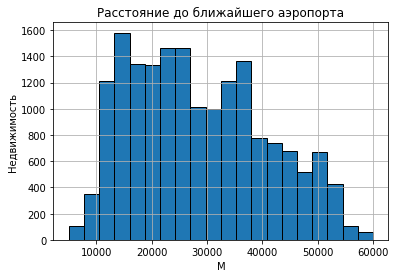

In [ ]:
data.hist('airports_nearest', bins = 20, range = (5000, 60000), ec = 'black');
plt.xlabel('М');
plt.ylabel('Недвижимость');
plt.title('Расстояние до ближайшего аэропорта');

Рассматриваемые объекты находятся от аэропорта на расстоянии от 5000 до 60000 м. По графику видно, что большая часть объектов недвижимости находится в 15 км до 30 км от объекта. Пик достигается в точке 15000.

#### Столбец с расстоянием до ближайшего парка

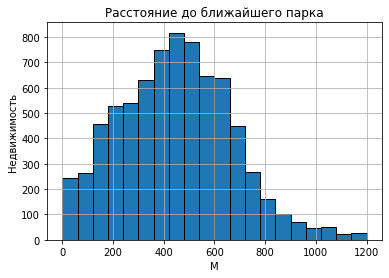

In [ ]:
data.hist('parks_nearest', bins = 20, range = (0, 1200), ec = 'black');
plt.xlabel('М');
plt.ylabel('Недвижимость');
plt.title('Расстояние до ближайшего парка');

Рассматриваемые объекты находятся от парка на расстоянии от 0 до 1200 м. По графику видно, что большая часть объектов недвижимости находится на расстоянии от 300 до 700 м. Пик достигается примерно в точке 450 м.

#### Столбец с днем публикации

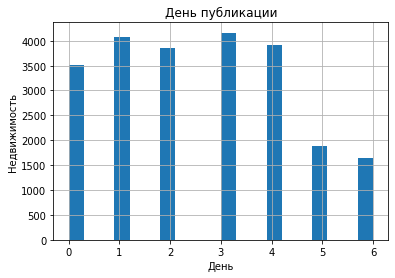

In [ ]:
data.hist('exposition_weekday', bins = 20);
plt.xlabel('День');
plt.ylabel('Недвижимость');
plt.title('День публикации');

По графику видно, что большая часть объектов недвижимости публиковалась в будние дни, в выходные реже.

#### Столбец с месяцем публикации

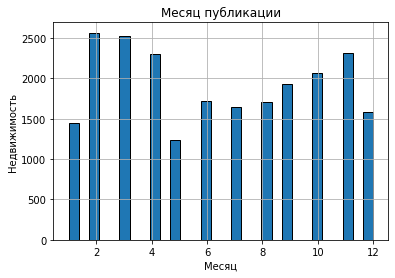

In [ ]:
data.hist('exposition_month', bins = 30, ec = 'black');
plt.xlabel('Месяц');
plt.ylabel('Недвижимость');
plt.title('Месяц публикации');

По графику видно, что большая часть объектов недвижимости публиковалась с февраля по апрель. Провал наблюдается с мая по июль.

**Проанализируем время продажи квартиры.**
* Построим гистограмму для столбца days_exposition

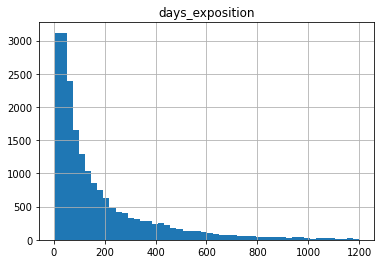

In [ ]:
data.hist('days_exposition', bins = 50);

Наблюдаем очень длинный хвост на графике. Можно сказать, что большая часть квартир продавались около 50 дней, но при таком хвосте, эти суждения могут быть ошибочными.
* Построим гистограмму для столбца days_exposition в диапозоне от 0 до 100 дней.

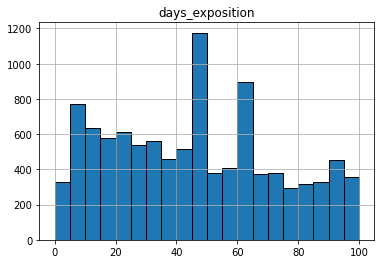

In [ ]:
data.hist('days_exposition', bins = 20, range = (0, 100), ec = 'black');

Судя по графику, большая часть квартир и вправду продовались в течение 50 дней.
* Посмотрим на среднее значение и медиану

In [ ]:
mean_days_exposition = int(round(data['days_exposition'].mean(), 0))
median_days_exposition =  int(data['days_exposition'].median())
print('Среднее значение =', mean_days_exposition)
print('Медианное значение =', median_days_exposition)

Среднее значение = 175
Медианное значение = 94


Медианное значение в два раза меньше среднего. Стандартное отклонение превышает среднее, что говорит о большом количество выбросов.

**В столбце days_exposition присутствует большое количество выбросов. Возможно, они появляются из-за истекшего срока объявлений. Значения, которые меньше медианного (95 дней) будем считать быстрой продажей, а значения которые больше среднего (181 день) - долгой продажей.**

#### Выясним какие факторы больше всего влияют на общую стоимость объекта

Для лучшей визуализации воспользуемся графиком heatmap

In [ ]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'cost_per_square',
       'exposition_weekday', 'exposition_month', 'exposition_year',
       'floor_category', 'city_centers_nearest_km'],
      dtype='object')


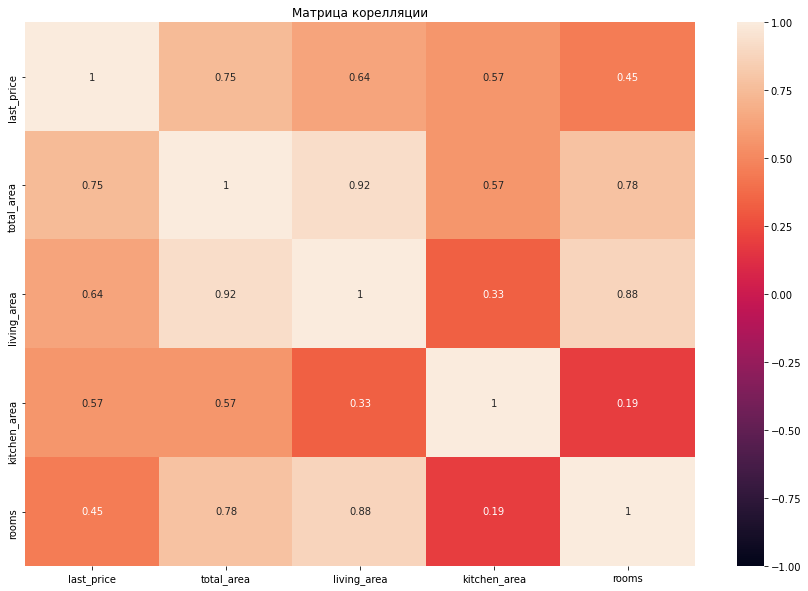

In [ ]:
cols = ['last_price',  # создаем список с нужными столбцами для матрицы корелляции
        'total_area',
        'living_area',
        'kitchen_area',
        'rooms',
       ]


corr_matrix = data[cols].corr() # создание матрицы корелляции
plt.figure(figsize = (15, 10)) # задаем параметры для размера графика
plt.title('Матрица корелляции') # задаем название для графика
sb.heatmap(corr_matrix, annot = True, vmin = -1); # создаем hetmap по матрице корелляции

**Зависимость цены от типа этажа**

,mean,count,median
floor_category,,,
другой,6.185676e+06,16989,4800000.0
первый,4.609521e+06,2855,3900000.0
последний,5.603354e+06,3202,4250000.0


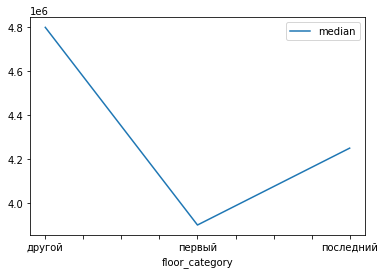

In [ ]:
# создание сводной таблицы
pivot_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_floor_category.columns = ['mean', 'count', 'median'] # новые названия для столбцов

pivot_floor_category.plot(y = 'median', legend=True) # построение графика

pivot_floor_category # вывод

**Исходя из анализирования данного графика можно сделать вывод, что медианное значение для первого этажа самое маленькое, для последнего тоже не огромное, а вот на остльных этажах медианное значение намного выше. Значит, квартиры на первом и последнем этажах дешевле, чем на других.**

**Зависимость цены от общей площади**

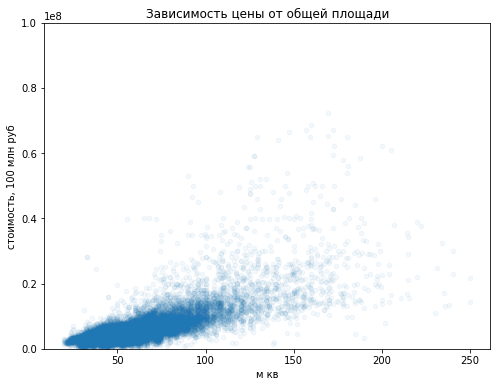

In [ ]:
data.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.05)

plt.title('Зависимость цены от общей площади')
plt.xlabel('м кв')
plt.ylabel('стоимость, 100 млн руб')
plt.ylim(0, 100000000)
plt.show()

**По данному графику видно, что основную часть квартир составляет до 20 млн рублей и площадью до 120 кв м. Зависимость также видна, чем больше площадь, тем выше стоимость.**

**Зависимость цены от жилой площади**

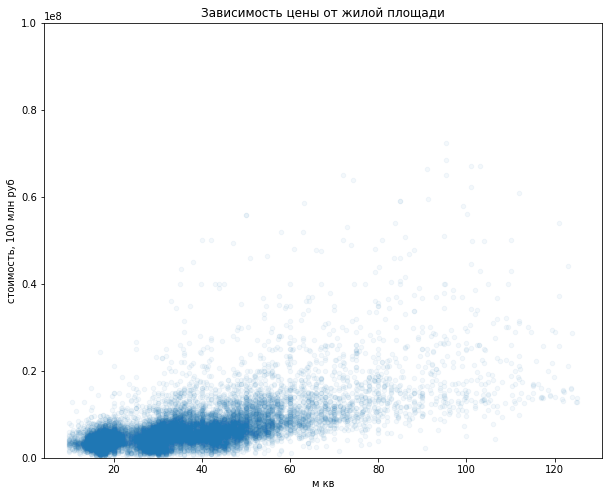

In [ ]:
data.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(10, 8), legend=True, alpha = 0.05)

plt.title('Зависимость цены от жилой площади')
plt.xlabel('м кв')
plt.ylabel('стоимость, 100 млн руб')
plt.ylim(0, 100000000)
plt.show()

**По данному графику видно, что основная часть квартир имеют площадь до 60 кв м и ценой до 20 млн рублей. Зависимость наблюдается, чем больше площадь, тем выше стоимость.**

**Зависимость цены от площади кухни**

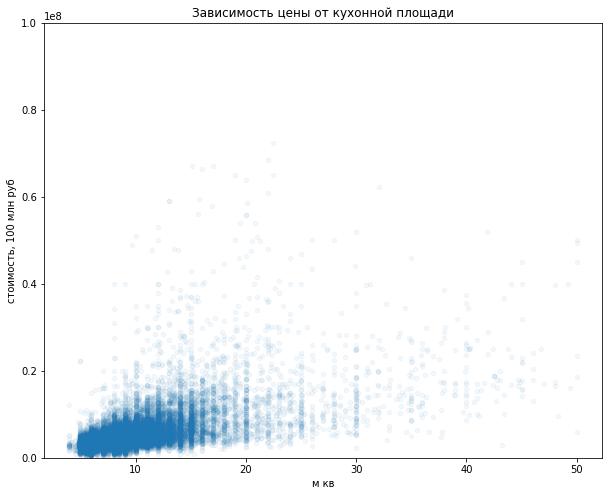

In [ ]:
data.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(10, 8), legend=True, alpha = 0.05)

plt.title('Зависимость цены от кухонной площади')
plt.xlabel('м кв')
plt.ylabel('стоимость, 100 млн руб')
plt.ylim(0, 100000000)
plt.show()

**График получился очень разбросанный, но все равно можно сказать что основную часть квартир составляют стоимостью до 20 млн и кухонной площадью до 20 кв м. Зависимость наблюдается, чем больше площадь, тем выше стоимость**

**Зависимость цены от количества комнат**

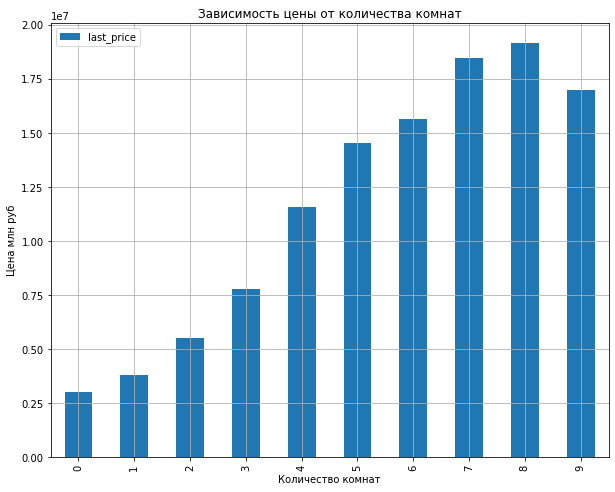

In [ ]:
data.pivot_table(index='rooms',values='last_price').plot(kind = 'bar', figsize =(10, 8), grid = True);
plt.title('Зависимость цены от количества комнат');
plt.xlabel('Количество комнат');
plt.ylabel('Цена млн руб');

**По данному графику видно, что зависимость между ценой и количеством комнат есть. Для квартир с количеством комнат больше 8, цена меньше (возможно ошибка в заполнение данных). В нашем случае, мы не берем квартиры с количеством комнат больше 5, так как их часть очень мала относительно квартир с 4 комнатами и меньше.**

**Зависимость цены от дня, месяца и года публикации**

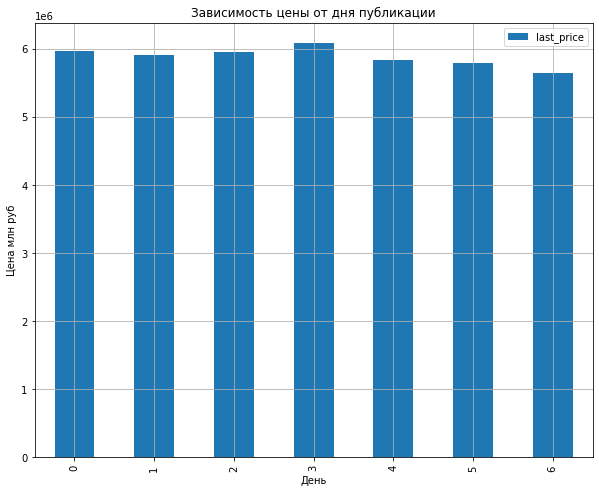

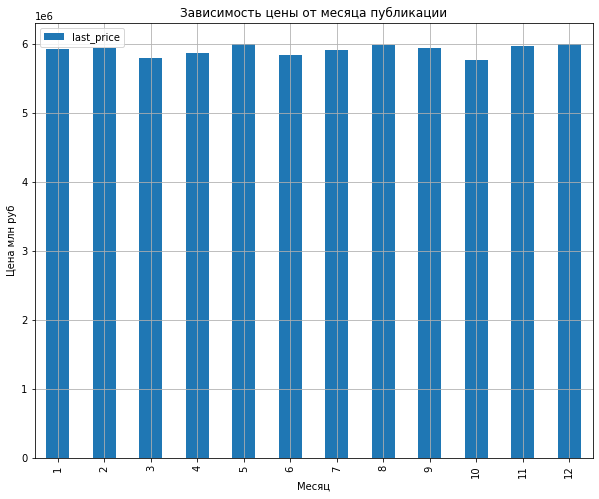

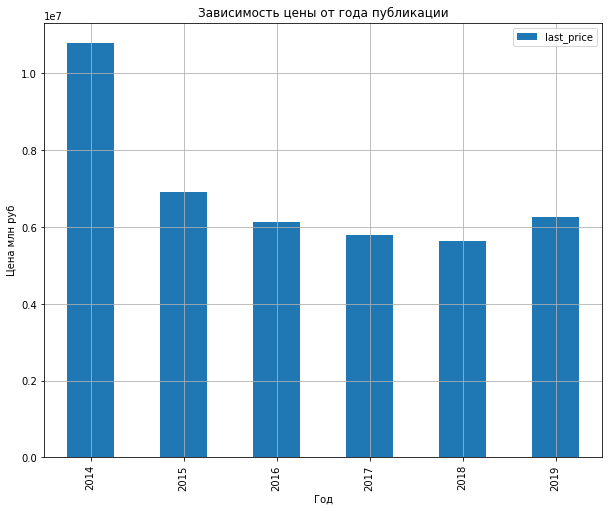

In [ ]:
data.pivot_table(index='exposition_weekday',values='last_price').plot(kind = 'bar', figsize =(10, 8), grid = True);
plt.title('Зависимость цены от дня публикации');
plt.xlabel('День');
plt.ylabel('Цена млн руб');

data.pivot_table(index='exposition_month',values='last_price').plot(kind = 'bar', figsize =(10, 8), grid = True);
plt.title('Зависимость цены от месяца публикации');
plt.xlabel('Месяц');
plt.ylabel('Цена млн руб');

data.pivot_table(index='exposition_year',values='last_price').plot(kind = 'bar', figsize =(10, 8), grid = True);
plt.title('Зависимость цены от года публикации');
plt.xlabel('Год');
plt.ylabel('Цена млн руб');

**По данным графикам видно, что зависимости между днем, месяцем и стоимостью объекта нет.**

**Посмотрим на изменение количества публикуемых объявлений за 5 лет**

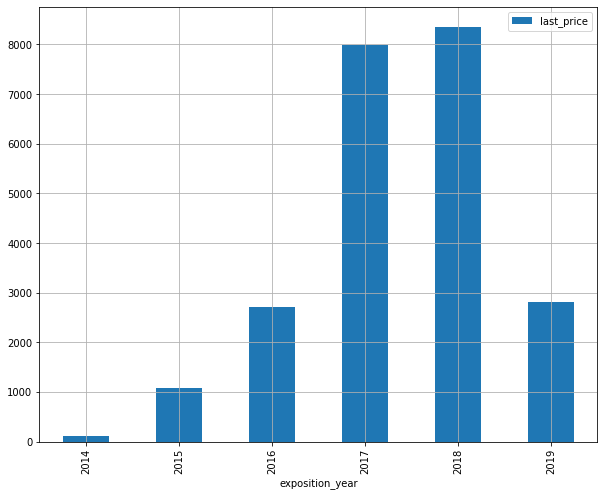

In [ ]:
data.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'count').plot(kind = 'bar', figsize =(10, 8), grid = True);

По данному графику видно существенное изменение количества объявлений.

**Посмотрим на изменение средней общей площади квартир с годами**


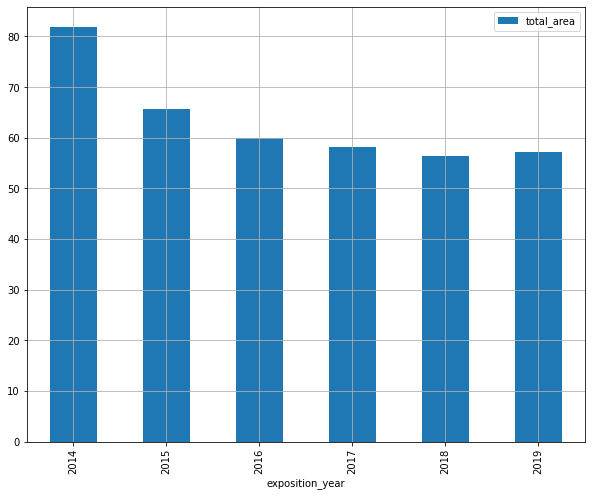

In [ ]:
data.pivot_table(index = 'exposition_year', values = 'total_area', aggfunc = 'mean').plot(kind = 'bar', figsize =(10, 8), grid = True);

По данным графикам можно сделать вывод, что общая площадь зависит от года публикации, а также количество записей зависит от года публикации.
<br>
Но если общая площадь зависит от года публикации, значит и цена зависит от года публикации.

**Промежуточный вывод для описания зависимости цены объекта от других факторов**
<br> На цену объекта влияет довольно много факторов, такие как:
1. Общая площадь, жилая площадь, кухонная площадь
2. Тип этажа квартиры
3. Локация квартиры
4. Год публикации
5. Количество комнат
<br> Но, многие из этих факторов изменяются с годами, например
* Средняя общая площадь с каждым годом становится всё меньше, значит и цена соотвественно стала меньше по сравнению с другими годами
* Также изменяется количество объявлений из разных локаций
* Изменяется доля дорогих категорий, типа этажа квартиры
<br> То есть корректней сравнивать цены объекта в какой-то определенный год, по месяцам

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
most_popular = data['locality_name'].value_counts().head(10) # сохраняем в переменной most_popular 10 пунктов с наиб. числом объявлений

print(most_popular)

Санкт-Петербург      15177
посёлок Мурино         549
посёлок Шушары         437
Всеволожск             396
Пушкин                 356
Колпино                336
посёлок Парголово      325
Гатчина                307
деревня Кудрово        299
Выборг                 234
Name: locality_name, dtype: int64


In [ ]:
# выведем цену за кв м из переменной most_popular
most_popular_pivot = data.query('locality_name in @most_popular.index').pivot_table(index='locality_name', values='cost_per_square')

most_popular_pivot = most_popular_pivot.sort_values(by='cost_per_square', ascending=False)

most_popular_pivot

,cost_per_square
locality_name,
Санкт-Петербург,112519.413424
Пушкин,102858.833431
деревня Кудрово,92473.547576
посёлок Парголово,90132.513945
посёлок Мурино,85526.942327
посёлок Шушары,78554.913659
Колпино,75352.475583
Гатчина,68746.146763
Всеволожск,68735.603880


Отобразим эти данные на графике.

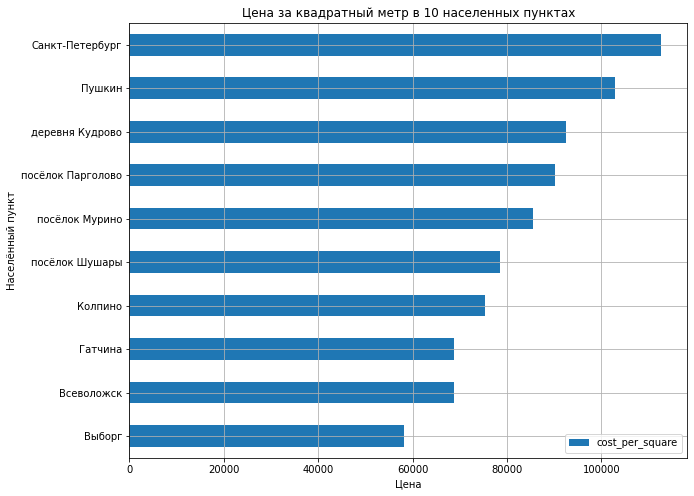

In [ ]:
most_popular_pivot.sort_values(by = 'cost_per_square', ascending = True).plot(kind = 'barh', grid = True, figsize = (10, 8));
plt.title('Цена за квадратный метр в 10 населенных пунктах');
plt.xlabel('Цена');
plt.ylabel('Населённый пункт');

**Промежуточный вывод по анализированию цены в 10 городах за 1 кв м**
* Самые дорогие квартиры находятся в Санкт-Петербурге, что ожидаемо (больше 100 тыс рублей за 1 кв метр)
* После Санкт-Петербурга следует город Пушкин (также, больше 100 тыс рублей за 1 кв метр)
* В городе Выборг, из 10 городов с наибольшим числом объявлений, расположены самые дешёвые квартиры (меньше 60 тыс рублей за 1 кв метр)

#### Выделим квартиры в Санкт-Петербурге с помощью столбца 'locality_name' и вычислим среднюю цену каждого километра

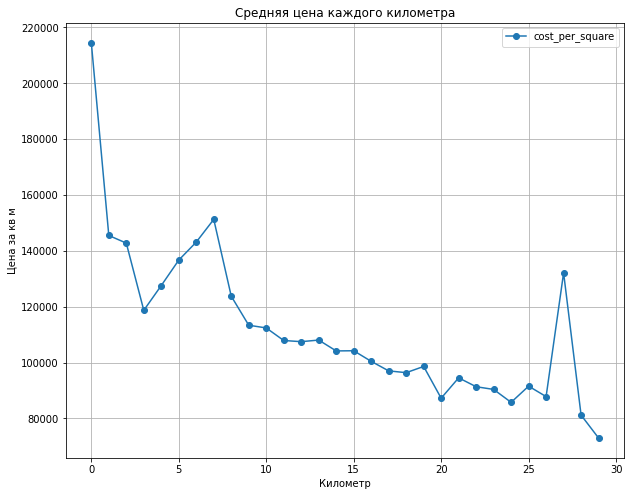

In [ ]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

(data_spb
        .pivot_table(index = 'city_centers_nearest_km', values = 'cost_per_square')
        .plot(marker = 'o', figsize = (10, 8), grid = True)
);

plt.title('Средняя цена каждого километра');
plt.xlabel('Километр');
plt.ylabel('Цена за кв м');

**По графику видно, что после 7 километра цена уменьшается. Пик достигается в точке 0, это квартиры в самом центре. В точке 27 можем увидеть неожиданное увеличение (возможно из-за премиального типа жилья или района).**

**Посмотрим внимательнее на выброс на 27-м км**

In [ ]:
display(data_spb[data_spb['city_centers_nearest_km'] == 27])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
723,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,другой,27.0
5797,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,последний,27.0


Скорее всего пик появляется из-за 726 строки, цена объекта равна почти 14,5 млн. Нужно посмотреть на значения на 26 км.

In [ ]:
display(data_spb[data_spb['city_centers_nearest_km'] == 26])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
247,17,3340000.0,37.00,2018-03-28,1,NaN,5,19.00,4,False,...,251.0,1.0,350.0,75.0,90270.270270,2,3,2018,другой,26.0
523,13,3250000.0,40.00,2018-06-25,1,NaN,10,NaN,1,False,...,159.0,1.0,1250.0,45.0,81250.000000,0,6,2018,первый,26.0
1197,7,3355000.0,37.77,2017-12-21,1,2.60,12,14.56,5,False,...,159.0,1.0,1250.0,147.0,88827.111464,3,12,2017,другой,26.0
3243,6,3090000.0,33.30,2017-01-17,1,NaN,5,12.00,4,False,...,126.0,1.0,979.0,489.0,92792.792793,1,1,2017,другой,26.0
3674,10,3392333.0,34.51,2018-10-01,1,NaN,5,15.00,4,False,...,400.0,1.0,492.0,145.0,98300.000000,0,10,2018,другой,26.0
3877,5,2950000.0,36.30,2016-12-28,1,NaN,5,15.25,1,False,...,126.0,1.0,979.0,159.0,81267.217631,2,12,2016,первый,26.0
5097,13,3150000.0,50.00,2018-09-04,2,2.65,3,28.00,3,False,...,NaN,0.0,NaN,30.0,63000.000000,1,9,2018,последний,26.0
5986,10,5254628.0,57.39,2018-10-10,3,NaN,5,31.00,3,False,...,251.0,1.0,350.0,135.0,91559.993030,2,10,2018,другой,26.0
6435,10,3230765.0,33.83,2018-10-10,1,NaN,5,14.00,1,False,...,400.0,1.0,492.0,100.0,95500.000000,2,10,2018,первый,26.0
7488,10,3001767.0,35.29,2018-10-01,1,NaN,5,10.00,4,False,...,297.0,1.0,465.0,145.0,85059.988665,0,10,2018,другой,26.0


**Вывод по пику на 27 км**
<br> Пик появляется из-за квартиры стоящей почти 14,5 млн. Так как на 27 км квартиры всего две, среднее получается очень большое по сравнению с квартирами на ближайших киллометрах.

**Посмотрим внимательнее на квартиры на 3 и 5 км**

In [ ]:
display(data_spb[data_spb['city_centers_nearest_km'] == 3])
display(data_spb[data_spb['city_centers_nearest_km'] == 5])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
99,32,9600000.0,90.0,2017-09-26,4,NaN,5,67.0,2,False,...,NaN,0.0,NaN,104.0,106666.666667,1,9,2017,другой,3.0
137,8,4800000.0,40.0,2017-11-18,2,NaN,3,29.0,2,False,...,NaN,2.0,729.0,80.0,120000.000000,5,11,2017,другой,3.0
153,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,False,...,344.0,1.0,838.0,38.0,102500.000000,1,11,2018,другой,3.0
177,5,14800000.0,108.7,2019-04-11,3,4.00,5,72.4,5,False,...,559.0,0.0,NaN,NaN,136154.553818,3,4,2019,последний,3.0
179,2,7900000.0,71.8,2017-08-23,3,3.00,5,38.7,1,False,...,NaN,1.0,585.0,NaN,110027.855153,2,8,2017,первый,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22536,7,5950000.0,60.0,2018-02-01,3,2.80,5,42.0,1,False,...,NaN,0.0,NaN,85.0,99166.666667,3,2,2018,первый,3.0
22742,7,5600000.0,50.0,2017-08-21,1,NaN,5,27.0,1,False,...,394.0,3.0,56.0,45.0,112000.000000,0,8,2017,первый,3.0
22783,18,5260000.0,38.0,2018-11-06,1,3.30,5,16.0,1,False,...,538.0,1.0,466.0,12.0,138421.052632,1,11,2018,первый,3.0
22801,4,6300000.0,52.6,2015-05-28,3,3.25,5,29.8,2,False,...,218.0,3.0,69.0,505.0,119771.863118,3,5,2015,другой,3.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,648.0,1.0,779.0,37.0,169491.525424,1,9,2018,другой,5.0
140,8,6500000.0,32.6,2019-02-27,1,NaN,5,18.5,5,False,...,NaN,0.0,NaN,NaN,199386.503067,2,2,2019,последний,5.0
157,14,7050000.0,66.0,2017-09-04,3,3.00,4,37.8,4,False,...,NaN,1.0,1013.0,98.0,106818.181818,0,9,2017,последний,5.0
215,12,7700000.0,58.7,2017-12-12,1,NaN,7,17.0,3,False,...,239.0,0.0,NaN,136.0,131175.468484,1,12,2017,другой,5.0
256,14,37500000.0,158.0,2019-01-24,4,NaN,12,88.0,4,False,...,NaN,2.0,840.0,NaN,237341.772152,3,1,2019,другой,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22899,5,19600000.0,184.0,2016-04-21,3,3.00,19,55.7,19,False,...,NaN,0.0,NaN,205.0,106521.739130,3,4,2016,последний,5.0
22909,20,13800000.0,108.6,2016-09-12,3,NaN,19,70.6,7,False,...,NaN,1.0,503.0,354.0,127071.823204,0,9,2016,другой,5.0
22937,7,8100000.0,69.0,2015-10-14,2,NaN,10,NaN,8,False,...,NaN,1.0,874.0,823.0,117391.304348,2,10,2015,другой,5.0
23011,5,9000000.0,110.0,2015-12-10,4,3.36,7,64.6,5,False,...,417.0,1.0,118.0,816.0,81818.181818,3,12,2015,другой,5.0


Проверим тип этажа квартиры на 3 км

In [ ]:
print('Количество квартир на первом этаже =', data_spb[(data_spb['floor_category'] == 'первый') &
               (data_spb['city_centers_nearest_km'] == 3)][
'floor_category'].count())

print('Количество квартир на последнем этаже =', data_spb[(data_spb['floor_category'] == 'последний') &
               (data_spb['city_centers_nearest_km'] == 3)][
'floor_category'].count())

Количество квартир на первом этаже = 53
Количество квартир на последнем этаже = 74


Проверим тип этажа квартиры на 5 км

In [ ]:
print('Количество квартир на первом этаже =', data_spb[(data_spb['floor_category'] == 'первый') &
               (data_spb['city_centers_nearest_km'] == 5)][
'floor_category'].count())

print('Количество квартир на последнем этаже =', data_spb[(data_spb['floor_category'] == 'последний') &
               (data_spb['city_centers_nearest_km'] == 5)][
'floor_category'].count())

Количество квартир на первом этаже = 78
Количество квартир на последнем этаже = 127


На 3 киллометре количество квартир на первом и последнем этажах = 20% от всех квартир
На 5 киллометре количество квартир на первом и последнем этажах = 14% от всех квартир.

**Вывод по квартирам на 3 и 5 км**
<br> Скорее всего на 3 км идёт спад из-за того, что 1/5 всех квартир составляют квартиры на первом и последних этажах, которые дешевле, чем на других
<br> А на 5 киллометре идёт увелечение цены, так как квартир на первом и последнем этажах на 5 киллометре меньше.

**Промежуточный вывод после исследования данных**
1. На этом этапе были изучены такие параметры, как
  - общая площадь:
      * основная часть недвижимости имеет 45 кв м общей площади
  - жилая площадь:
      * основная часть недвижимости имеет 15 кв м жилой площади
  - площадь кухни:
      * основная часть недвижимости имеет 8 кв м кухонной площади
  - цена объекта:
      * основная часть недвижимости стоит 3,5 млн рублей
      * зависит от
          * общей площади
          * жилой площади
          * кухоннной площади
          * количества комнат
  - количество комнат:
      * основная часть недвижимости имеет 1 комнату
  - высота потолков:
      * основная часть недвижимости имеет высоту потолков в 2,5 метра
  - этаж квартиры:
      * основная часть недвижимости расположена на 2 этаже
  - тип этажа квартиры («первый», «последний», «другой»):
      * основная часть недвижимости расположена между 1 и последнем этажами
  - общее количество этажей в доме:
      * основная часть недвижимости - пятиэтажки
  - расстояние до центра города в метрах:
      * основная часть недвижимости находится на расстоянии 12,5 км от центра
  - расстояние до ближайшего аэропорта:
      * основная часть недвижимости находится на расстоянии 15 км от аэропорта
  - расстояние до ближайшего парка:
      * основная часть недвижимости находится на расстоянии 450 м от парка
  - день и месяц публикации объявления:
      * основная часть недвижимости публиковалась в будние дни и в феврале
2. Также, описаны продажи, какие продажи, а какие долгие
    * быстрые продажи - до 95 дней
    * долгие продажи - больше 181 дня
3. Посчитана цена одного квадратного метра в 10 населённых пунктах с наибольшим количеством публикаций
    * дороже всего в Санкт-Петербурге (дороже 100 тысяч рублей за 1 кв м)
    * дешевле всего в Выборге (дешевле 60 тысяч рублей за 1 кв м)
4. Описано, как стоимость объекта зависит от расстояния до центра
    * дороже всего квартиры на расстоянии до 3 км невключительно, а также от 5 до 7 км
    * после расстояния в 7 км от центра квартиры дешевеют

### Общий вывод

В результате выполненой работы:
1. Были выполнены все этапы разработки проекта.
2. Было выяснено, что на стоимость квартиры больше всего влияет площадь, а точнее общая площадь, жилая площадь и кухонная площадь, а также количество комнат. Помимо площади и количества комнат, на стоимость квартиры влияет её местоположение: чем ближе квартира к центру, тем она дороже; и год публикации.
3. Самые дорогие квартиры находятся в Санкт-Петербурге (больше 100 руб за 1 кв м)